# Johan Knarreborg 

## Research question/interests

I would like to look at how import the car is. It would also be interesting to see what the most dominating car and driver has been. 

In [68]:
#Importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt 

def dataPileline(): 
    #Importing the raw data and substituing the '\N' values for NaN. 
    circuits = pd.read_csv("../data/raw/circuits.csv", na_values=['\\N'])
    drivers = pd.read_csv("../data/raw/drivers.csv",na_values=['\\N'])
    results = pd.read_csv("../data/raw/results.csv", na_values=['\\N'])
    seasons = pd.read_csv("../data/raw/seasons.csv", na_values=['\\N'])
    status = pd.read_csv("../data/raw/status.csv", na_values=['\\N'])
    lap_times = pd.read_csv("../data/raw/lap_times.csv", na_values=['\\N'])
    pit_stops = pd.read_csv("../data/raw/pit_stops.csv", na_values=['\\N'])
    qualifying = pd.read_csv("../data/raw/qualifying.csv", na_values=['\\N'])
    races = pd.read_csv("../data/raw/races.csv", na_values=['\\N'])
    constructors = pd.read_csv("../data/raw/constructors.csv", na_values=['\\N'])
    constructor_results = pd.read_csv("../data/raw/constructor_results.csv", na_values=['\\N'])
    constructor_standings = pd.read_csv("../data/raw/constructor_standings.csv", na_values=['\\N'])
    driver_standings = pd.read_csv("../data/raw/driver_standings.csv", na_values=['\\N'])
    
    #cleaning the data
    #Since we are going to use the results df and the races df together we are going to merge them together using ther raceId and exclude any unnecessary columns. 
    results_races = pd.merge(results,races,on="raceId",how="left")
    results_races = results_races.drop(["url","time_y"],axis=1)
    

# Explanatory Data Analysis

To get some inseights into the data we will look at the following parts of the data: 

    - The average finish time for each season 
    
    - The number of different circuits in each season 
    
    - 

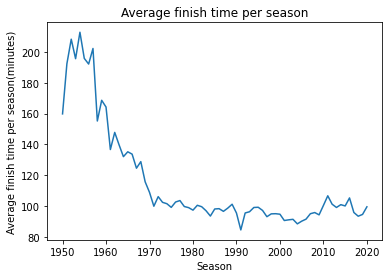

In [41]:
#Finding the average times per season

#Going through each season and finding the average time for all the cars that finish the race 
avg_time=[[],[]]
for i in range(1950,2021): 
    season = results_races[results_races["year"]==i]
    mean = season["milliseconds"].mean()
    #convert milliseconds to minutes
    mean = mean/(1000*60)
    avg_time[0].append(i)
    avg_time[1].append(mean)
plt.plot(avg_time[0],avg_time[1])
plt.title("Average finish time per season")
plt.xlabel("Season")
plt.ylabel("Average finish time per season(minutes)")
plt.show()

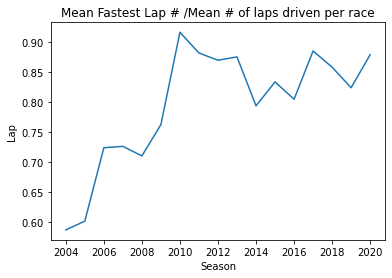

In [66]:
#For the fastest lap there is only data from 2004 and onwards 
#We find the mean fastest lap for each season devided by the mean number of laps driven each season. 

#Going through each season and finding the average time for all the cars that finish the race 
mean_lap=[[],[]]
for i in range(1950,2021): 
    season = results_races[results_races["year"]==i]
    mean = season["fastestLap"].mean()/season["laps"].mean()
    mean_lap[0].append(i)
    mean_lap[1].append(mean)
plt.plot(mean_lap[0],mean_lap[1])
plt.title("Mean Fastest Lap # /Mean # of laps driven per race")
plt.xlabel("Season")
plt.ylabel("Lap")
plt.show()


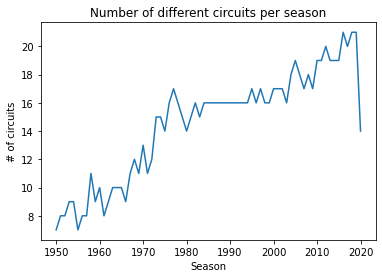

In [67]:
#Number of circuits per season 
year_season =[[],[]]
for i in range(1950,2021): 
    season = results_races[results_races["year"]==i]
    n = season.circuitId.unique()
    year_season[0].append(i)
    year_season[1].append(len(n))
plt.plot(year_season[0],year_season[1])
plt.title("Number of different circuits per season")
plt.xlabel("Season")
plt.ylabel("# of circuits")
plt.show()


In [117]:
pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8369,1060,832,1,48,16:01:07,21.431,21431
8370,1060,20,2,49,16:02:39,20.841,20841
8371,1060,852,2,51,16:04:57,26.604,26604
8372,1060,1,2,53,16:06:32,21.421,21421


14    71
Name: circuitId, dtype: int64
    circuitId circuitRef                          name location country  \
13         14      monza  Autodromo Nazionale di Monza    Monza   Italy   

        lat      lng  alt                                                url  
13  45.6156  9.28111  162  http://en.wikipedia.org/wiki/Autodromo_Naziona...  
       resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
25135     25141    1060       849              3      6    18       16   
25136     25142    1060        20            117      5    1

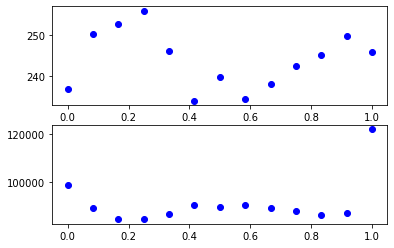

In [28]:
#same driver, same track  and their fastest lap through the years
#find the most used circuit
count = races.circuitId.value_counts()
print(count[0:1])
#Circuit 14 has been used the most with 71 races. 
#Looking up circuit 14
print(circuits[13:14])
#Making new dataframe merging results and what circuits 
races2= races.drop(["year","round","name","date","time","url"],axis=1)
results2 = pd.merge(results,races2,on="raceId",how="left")
print(results2)
driverTop = results2.driverId.value_counts()
print(driverTop[0:10])
#driver 8 has been driving most races at the most raced track
import matplotlib.pyplot as plt 
import numpy as np
#plotting the fastest laptime and the average laptime for driver 8 for every race at track 14. 
driver8 = results2[results2["circuitId"]==14]
driver8 = driver8[driver8["driverId"]==8]
driver8 = driver8.drop([2137,2510,2870,1812,24474],axis=0)
print(driver8)
driver8["fastestLapSpeed"] = pd.to_numeric(driver8["fastestLapSpeed"], downcast="float")
driver8["milliseconds"] = pd.to_numeric(driver8["milliseconds"], downcast="float")
driver8["laps"] = pd.to_numeric(driver8["laps"], downcast="float")
fig, axs = plt.subplots(2)
axs[0].plot(np.linspace(0,1,len(driver8["fastestLapSpeed"])),driver8["fastestLapSpeed"],'bo')
axs[1].plot(np.linspace(0,1,len(driver8["fastestLapSpeed"])),driver8["milliseconds"]/driver8["laps"],'bo')
